# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import datetime

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [2]:
apple = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv")

### Step 3. Assign it to a variable apple

### Step 4.  Check out the type of the columns

In [5]:
apple.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

### Step 5. Transform the Date column as a datetime type

In [7]:
apple['Date'] = pd.to_datetime(apple['Date'])

### Step 6.  Set the date as the index

In [9]:
apple.set_index("Date", inplace=True)

### Step 7.  Is there any duplicate dates?

In [10]:
apple.index.nunique()

8465

In [11]:
apple.shape

(8465, 6)

In [14]:
apple.index.unique().__len__()

8465

In [20]:
apple.index.duplicated()

array([False, False, False, ..., False, False, False])

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [21]:
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [23]:
apple.sort_index(inplace=True)

### Step 9. Get the last business day of each month

In [27]:
apple.to_dict().keys()

dict_keys(['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'])

In [29]:
apple.to_json()[:5]

'{"Ope'

In [30]:
apple.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Open</th>\n      <th>High</th>\n      <th>Low</th>\n      <th>Close</th>\n      <th>Volume</th>\n      <th>Adj Close</th>\n    </tr>\n    <tr>\n      <th>Date</th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>1980-12-12</th>\n      <td>28.75</td>\n      <td>28.87</td>\n      <td>28.75</td>\n      <td>28.75</td>\n      <td>117258400</td>\n      <td>0.45</td>\n    </tr>\n    <tr>\n      <th>1980-12-15</th>\n      <td>27.38</td>\n      <td>27.38</td>\n      <td>27.25</td>\n      <td>27.25</td>\n      <td>43971200</td>\n      <td>0.42</td>\n    </tr>\n    <tr>\n      <th>1980-12-16</th>\n      <td>25.37</td>\n      <td>25.37</td>\n      <td>25.25</td>\n      <td>25.25</td>\n      <td>26432000</td>\n      <td>0.39</td>\n    </tr>\n    <tr>\n      <th>1980-12-17</th>\n 

In [37]:
apple.to_csv("temp_apple.csv", index=True)

In [41]:
apple.last("BM")

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35


### Step 10.  What is the difference in days between the first day and the oldest

In [52]:
apple[:13].mean()[0]

30.48153846153846

In [53]:
apple.resample("M").mean()[:10]

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,30.481538,30.567692,30.443077,30.443077,2.586252e+07,0.473077
1981-01-31,31.754762,31.826667,31.654762,31.654762,7.249867e+06,0.493810
1981-02-28,26.480000,26.572105,26.407895,26.407895,4.231832e+06,0.411053
1981-03-31,24.937727,25.016818,24.836364,24.836364,7.962691e+06,0.387727
1981-04-30,27.286667,27.368095,27.227143,27.227143,6.392000e+06,0.423333
1981-05-31,29.052000,29.188000,28.995000,28.995000,7.380240e+06,0.452500
1981-06-30,30.801818,30.876364,30.703636,30.703636,1.080189e+07,0.477727
1981-07-31,24.436364,24.531818,24.374545,24.374545,7.584436e+06,0.379545
1981-08-31,22.336500,22.386500,22.218500,22.218500,6.857760e+06,0.345000


In [55]:
apple.index.max() - apple.index.min()

Timedelta('12261 days 00:00:00')

### Step 11.  How many months in the data we have?

In [59]:
apple.resample("M").__len__()

404

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

In [60]:
import matplotlib.pyplot as plt

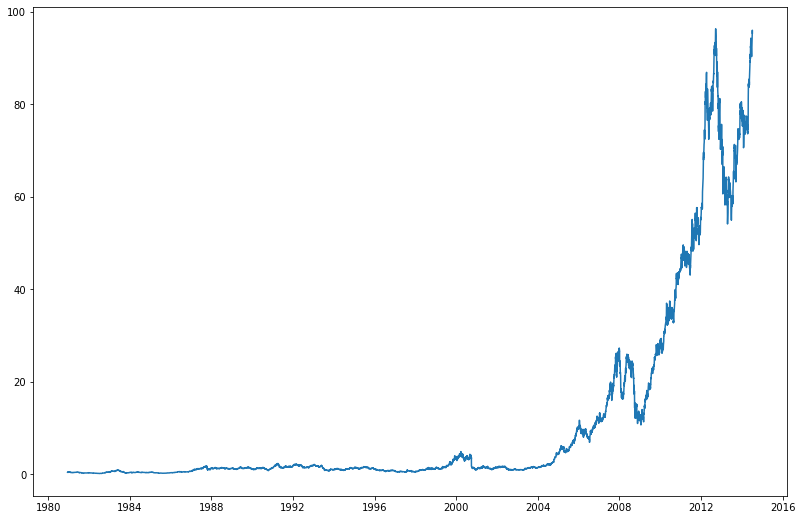

In [61]:
plt.figure(figsize=(13.5, 9))
plt.plot(apple['Adj Close'])

### BONUS: Create your own question and answer it.